In [44]:
import sys
sys.path.append('C:\Users\Admin\PycharmProjects\open_AR_Sandbox\notebooks\prototypes\Landslides\Landslide_topo')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-44-4f14b4dab745>, line 2)

In [46]:
infile= 'C:\Users\Admin\PycharmProjects\open_AR_Sandbox\notebooks\prototypes\Landslides\Landslide_topo\Landslide_test_1.npz'
f = open(infile, "r")
ncols =f.readline().split()[1]
nrows f.readline().split()[1]
xllcorner = f.readline().split()[1]
yllcorner=b  f.readline().split()[1] 
NODATA_value = f.readline().split()[1]

SyntaxError: invalid syntax (<ipython-input-46-c16b7b375665>, line 4)

In [51]:
infile= 'C:/Users/Admin/PycharmProjects/open_AR_Sandbox/notebooks/prototypes/Landslides/Landslide_topo/Landslide_test_1.npz'
infile2 = 'C:/Users/Admin/PycharmProjects/open_AR_Sandbox/notebooks/prototypes/Landslides/Landslide_topo/sandbox_testdata_vflow.npy'
infile3 = 'C:/Users/Admin/PycharmProjects/open_AR_Sandbox/notebooks/prototypes/Landslides/Landslide_topo/sandbox_testdata_hflow.npy'






In [52]:
f = np.load(infile)
f2 = np.load(infile2)
f3 = np.load(infile3)

In [24]:
f.files

['arr_0', 'arr_1']

In [30]:
a = f['arr_0']


In [31]:
b = f['arr_1']

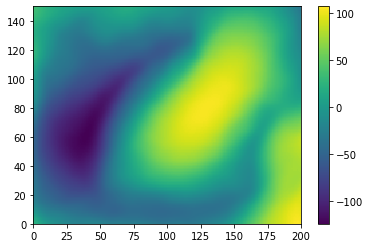

In [34]:
plt.pcolormesh(a)
plt.colorbar()


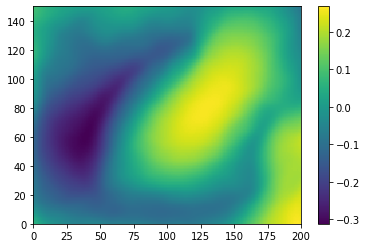

In [35]:
plt.pcolormesh(b)
plt.colorbar()

In [41]:
np.load('sandbox_testdata_hflow.npy')

FileNotFoundError: [Errno 2] No such file or directory: 'sandbox_testdata_hflow.npy'

In [50]:
f2.shape

(88, 182, 60)

In [54]:
f3.shape

(88, 182, 60)

In [57]:

f2.max()

14.977

In [231]:
release_file= 'C:/Users/Admin/PycharmProjects/open_AR_Sandbox/notebooks/prototypes/Landslides/Landslide_topo/hrelease_yt.asc'
topo_file= 'C:/Users/Admin/PycharmProjects/open_AR_Sandbox/notebooks/prototypes/Landslides/Landslide_topo/YT_HK5m_clip.asc'

f = open(release_file, "r")
ncols = int(f.readline().split()[1])
nrows = int(f.readline().split()[1])
xllcorner = float(f.readline().split()[1])
yllcorner=  float(f.readline().split()[1] )
cellsize = float(f.readline().split()[1])
NODATA_value = float(f.readline().split()[1])
data = [float(i) for i in f.read().split()]
data_release=np.reshape(np.array(data),(nrows,ncols))


f2 = open(topo_file, "r")
ncols2 = int(f2.readline().split()[1])
nrows2 = int(f2.readline().split()[1])
xllcorner2 = float(f2.readline().split()[1])
yllcorner2=  float(f2.readline().split()[1] )
cellsize2 = float(f2.readline().split()[1])
NODATA_value2 = float(f2.readline().split()[1])
data2 = [float(i) for i in f2.read().split()]
data_topo=np.reshape(np.array(data2),(nrows2,ncols2))


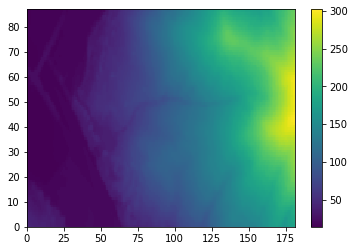

In [232]:
plt.pcolormesh(data_topo)
plt.colorbar()

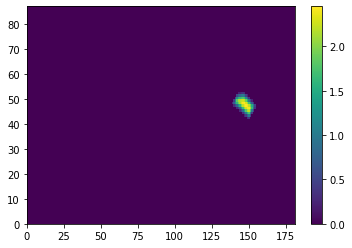

In [233]:
plt.pcolormesh(data_release)
plt.colorbar()

In [186]:
ncols2

'181'

In [190]:
topo_file= 'C:/Users/Admin/PycharmProjects/open_AR_Sandbox/notebooks/prototypes/Landslides/Landslide_topo/YT_HK5m_clip.asc'

f = open(read_file, "r")
f.read().split()

['ncols',
 '181',
 'nrows',
 '87',
 'xllcorner',
 '811787.500000000000',
 'yllcorner',
 '815687.500000000000',
 'cellsize',
 '5.000000000000',
 'NODATA_value',
 '-9999',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '0.00',
 '

In [220]:
data_yes=np.reshape(np.array(data2),(int(nrows),int(ncols)))

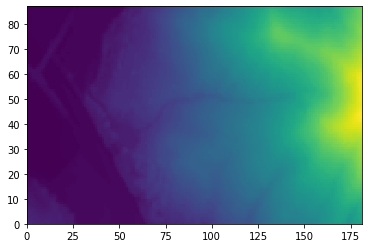

In [221]:
plt.pcolormesh(data_yes)

In [195]:
data2

['46.0',
 '45',
 '44',
 '42',
 '42',
 '40',
 '40',
 '40',
 '40',
 '40',
 '40',
 '40',
 '40',
 '38',
 '38',
 '38',
 '36',
 '37',
 '38',
 '36',
 '36',
 '34',
 '34',
 '34',
 '34',
 '31',
 '26',
 '22',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '22',
 '22',
 '22',
 '22',
 '22',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '20',
 '22',
 '22',
 '22',
 '22',
 '22',
 '28',
 '33',
 '36',
 '38',
 '40',
 '42',
 '44',
 '44',
 '44',
 '42',
 '42',
 '42',
 '44',
 '45',
 '46',
 '46',
 '46',
 '46',
 '48',
 '48',
 '48',
 '50',
 '52',
 '54',
 '54',
 '54',
 '56',
 '58',
 '60',
 '58',
 '56',
 '54',
 '54',
 '56',
 '58',
 '59',
 '62',
 '65',
 '68',
 '71',
 '74',
 '76',
 '78',
 '79',
 '80',
 '80',
 '82',
 '84',
 '84',
 '85',
 '88',
 '88',
 '86',
 '86',
 '84',
 '86',
 '88',
 '90',
 '92',
 '96',
 '100',
 '102',
 '104',
 '107',
 '110',
 '113',
 '116',
 '118',
 '122',
 '124',
 '126',
 '128',
 '130',
 '130',
 '132',
 '132',
 '